<a href="https://colab.research.google.com/github/MuhammadMazid/MuhammadMazid/blob/main/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt

In [ ]:
#settings
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
%matplotlib inline

In [ ]:
# Data Import "Median Income of inviduals in US States"
df_income = pd.read_excel("Income.xlsx")
# Data Import Timeseries data of crime from 1997-2016
df_crime_timeseries_raw = pd.read_excel("1997-2016.xls", skiprows  = 3)
# Data Import 2016 crime data by States
df_crime_2016 = pd.read_excel("2016.xls", skiprows  = 3)


# Use Case - EDA and Data Cleaning 


# EDA and datacleaning for  dataset of US crime from 1997-2016

In [ ]:
#column info, datatype , null
df_crime_timeseries_raw.info()
#KPI column details
df_crime_timeseries_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
Year                                             27 non-null object
Population1                                      20 non-null float64
Violent
crime2                                   20 non-null float64
Violent 
crime 
rate                             20 non-null float64
Murder and
nonnegligent 
manslaughter            21 non-null object
Murder and 
nonnegligent 
manslaughter 
rate     20 non-null float64
Rape
(revised
definition)3                       4 non-null object
Rape
(revised
definition) rate3                  3 non-null float64
Rape
(legacy
definition)4                        20 non-null float64
Rape
(legacy
definition) rate4                   20 non-null float64
Robbery                                          20 non-null float64
Robbery 
rate                                    20 non-null float64
Aggravated 
assault                              20 non-null float64
Aggra

,Population1,Violent crime2,Violent crime rate,Murder and nonnegligent manslaughter rate,Rape (revised definition) rate3,Rape (legacy definition)4,Rape (legacy definition) rate4,Robbery,Robbery rate,Aggravated assault,Aggravated assault rate,Property crime,Property crime rate,Burglary rate,Larceny- theft,Motor vehicle theft,Motor vehicle theft rate
count,2.000000e+01,2.000000e+01,20.000000,20.000000,3.000000,20.000000,20.000000,20.00000,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000
mean,2.957659e+08,1.373975e+06,468.795000,5.480000,37.166667,90662.250000,30.820000,409967.00000,139.955000,8.572291e+05,292.540000,9.878546e+06,3370.005000,726.835000,6.702525e+06,1.042040e+06,357.875000
std,1.767067e+07,1.459793e+05,77.510593,0.752959,1.357694,4340.182435,3.067075,54230.90019,26.021681,8.998958e+04,48.581211,1.008878e+06,541.092529,106.419618,5.992439e+05,2.552203e+05,105.062467
min,2.652286e+08,1.153022e+06,361.600000,4.400000,35.900000,82109.000000,25.900000,322905.00000,101.300000,7.267770e+05,229.200000,7.993631e+06,2487.000000,491.400000,5.706346e+06,6.868030e+05,215.400000
25%,2.843436e+08,1.242700e+06,400.325000,4.875000,36.450000,88329.000000,28.000000,365579.50000,117.950000,7.774952e+05,250.300000,9.097654e+06,2935.775000,701.225000,6.195669e+06,7.354702e+05,236.925000
50%,2.979528e+08,1.392603e+06,470.400000,5.550000,37.000000,90806.500000,31.700000,411803.00000,143.750000,8.606250e+05,289.700000,1.009718e+07,3389.050000,729.550000,6.704905e+06,1.156038e+06,406.200000
75%,3.098946e+08,1.428314e+06,505.000000,5.700000,37.800000,94378.250000,32.500000,444468.75000,148.875000,9.096938e+05,319.950000,1.043861e+07,3637.475000,743.100000,7.034446e+06,1.239084e+06,431.100000
max,3.214188e+08,1.688540e+06,636.600000,7.400000,38.600000,96252.000000,36.300000,535594.00000,201.900000,1.037049e+06,391.000000,1.180532e+07,4451.000000,945.000000,7.904685e+06,1.394238e+06,525.700000


In [ ]:
# Skiping unnecessary rows from dataset
df_crime_timeseries_step1clean = df_crime_timeseries_raw[pd.notnull(df_crime_timeseries_raw['Population1'])]
#recreating indexes
df_crime_timeseries_step1clean.reindex()
#fetching only required columns
df_crime_timeseries  = df_crime_timeseries_step1clean[['Year','Population1','Violent\ncrime2','Robbery'
                               ,'Burglary','Larceny-\ntheft','Property \ncrime','Motor \nvehicle \ntheft',
                                                       'Aggravated \nassault']]
#renaming of column for ease in use
df_crime_timeseries = df_crime_timeseries.rename(columns={'Population1': 'Population',
                                                                     'Violent\ncrime2': 'ViolentCrime',
                                                                     'Larceny-\ntheft': 'LarcenyTheft',
                                                                     'Property \ncrime': 'PropertyCrime',
                                                                     'Motor \nvehicle \ntheft': 'MotorVehicleTheft',
                                                                    'Aggravated \nassault': 'AggravatedAssault' })

df_crime_timeseries = df_crime_timeseries.astype(int)
#Adding a totals columns for all crimes
df_crime_timeseries["TotalCrimes"] = (df_crime_timeseries['ViolentCrime'] \
+ df_crime_timeseries['Robbery'] + df_crime_timeseries['Burglary'] \
+ df_crime_timeseries['LarcenyTheft'] \
+ df_crime_timeseries['PropertyCrime'] \
+ df_crime_timeseries['MotorVehicleTheft'] \
+ df_crime_timeseries['AggravatedAssault'])/1000000
df_crime_timeseries

,Year,Population,ViolentCrime,Robbery,Burglary,LarcenyTheft,PropertyCrime,MotorVehicleTheft,AggravatedAssault,TotalCrimes
0,1996,265228572,1688540,535594,2506400,7904685,11805323,1394238,1037049,26.871829
1,1997,267783607,1636096,498534,2460526,7743760,11558475,1354189,1023201,26.274781
2,1998,270248003,1533887,447186,2332735,7376311,10951827,1242781,976583,24.861310
3,1999,272690813,1426044,409371,2100739,6955520,10208334,1152075,911740,23.163823
4,2000,281421906,1425486,408016,2050992,6971590,10182584,1160002,911706,23.110376
5,2001,285317559,1439480,423557,2116531,7092267,10437189,1228391,909023,23.646438
6,2002,287973924,1423677,420806,2151252,7057379,10455277,1246646,891407,23.646444
7,2003,290788976,1383676,414235,2154834,7026802,10442862,1261226,859030,23.542665
8,2004,293656842,1360088,401470,2144446,6937089,10319386,1237851,847381,23.247711
9,2005,296507061,1390745,417438,2155448,6783447,10174754,1235859,862220,23.019911


# EDA and datacleaning for  dataset for "income by US States"

In [ ]:
df_income.info()
#No data cleaning required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
State     52 non-null object
Income    52 non-null int64
dtypes: int64(1), object(1)
memory usage: 912.0+ bytes


# EDA and datacleaning for  dataset for "US Crime in 2016"

In [ ]:
#column info, datatype , null
df_crime_2016.info()
#KPI column details
df_crime_2016.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 16 columns):
State                                     60 non-null object
Area                                      207 non-null object
Unnamed: 2                                300 non-null object
Population                                449 non-null object
Violent
crime1                            359 non-null object
Murder and 
nonnegligent 
manslaughter    350 non-null object
Rape
(revised
definition2)                346 non-null float64
Rape
(legacy
definition3)                 346 non-null float64
Robbery                                   346 non-null float64
Aggravated 
assault                       347 non-null object
Property 
crime                           353 non-null object
Burglary                                  347 non-null object
Larceny-
theft                            346 non-null float64
Motor 
vehicle 
theft                     346 non-null float64
Unnamed: 14            

,Rape (revised definition2),Rape (legacy definition3),Robbery,Larceny- theft,Motor vehicle theft,Unnamed: 14
count,346.000000,346.000000,346.000000,346.000000,346.000000,0.0
mean,1073.329480,787.306358,2768.000578,46590.996821,6375.576590,NaN
std,2083.014725,1539.214419,6918.587678,94154.707675,18280.234891,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,NaN
25%,75.775000,55.225000,58.250000,2399.275000,292.000000,NaN
50%,248.000000,178.500000,179.000000,9099.000000,786.000000,NaN
75%,1314.250000,967.750000,2400.750000,47851.750000,7509.000000,NaN
max,13702.000000,10149.000000,54789.000000,637010.000000,176756.000000,NaN


In [ ]:
# 2016 crime data by States - filling merged cells in excel
df_crime_2016.State = pd.Series(df_crime_2016.State).fillna(method='ffill')
df_crime_2016.Area = pd.Series(df_crime_2016.Area).fillna(method='ffill')

In [ ]:
df_crime_2016

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition2),Rape (legacy definition3),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Unnamed: 14,Unnamed: 15
0,ALABAMA,Metropolitan Statistical Area,NaN,3716889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,Metropolitan Statistical Area,Area actually reporting,0.992,20793,331,1489.0,1084.0,4174.0,14799,114605,26966,78072.0,9567.0,NaN,NaN
2,ALABAMA,Metropolitan Statistical Area,Estimated total,1,20949,332,1498.0,1091.0,4200.0,14919,115564,27156,78771.0,9637.0,NaN,NaN
3,ALABAMA,Cities outside metropolitan areas,NaN,520422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,Cities outside metropolitan areas,Area actually reporting,0.966,3551,41,263.0,187.0,410.0,2837,19841,4173,14332.0,1336.0,NaN,
5,ALABAMA,Cities outside metropolitan areas,Estimated total,1,3646,42,269.0,193.0,421.0,2914,20291,4275,14641.0,1375.0,NaN,NaN
6,ALABAMA,Nonmetropolitan counties,NaN,625989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ALABAMA,Nonmetropolitan counties,Area actually reporting,0.945,1220,31,141.0,95.0,61.0,987,7096,2490,3934.0,672.0,NaN,NaN
8,ALABAMA,Nonmetropolitan counties,Estimated total,1,1291,33,149.0,101.0,65.0,1044,7507,2634,4162.0,711.0,NaN,NaN
9,ALABAMA,State Total,NaN,4863300,25886,407,1916.0,1385.0,4686.0,18877,143362,34065,97574.0,11723.0,NaN,NaN


# Use Case - Population Growth and Growth Prediction 

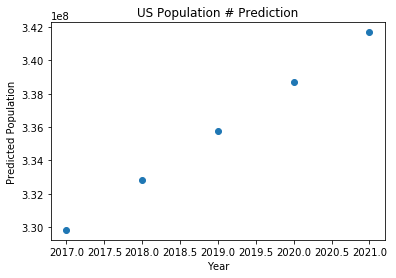

In [ ]:
# ordinary least squares regression 
#adding constant
df_crime_timeseries['Eins'] = np.ones(( len(df_crime_timeseries), ))
X = df_crime_timeseries[['Year','Eins']]
Y = df_crime_timeseries['Population']
result = sm.OLS( Y, X ).fit()
result.summary()

#Predicted Population value

X = [2017,1]
US_Population_2017 = result.predict(X)
X = [2018,1]
US_Population_2018 = result.predict(X)
X = [2019,1]
US_Population_2019 = result.predict(X)
X = [2020,1]
US_Population_2020 = result.predict(X)
X = [2021,1]
US_Population_2021 = result.predict(X)
#scatter plot representation
Y = pd.DataFrame({1:[US_Population_2017], 2:[US_Population_2018], 3:[US_Population_2019], 4:[US_Population_2020],5:[US_Population_2021]})
X = pd.DataFrame({1:[2017], 2:[2018], 3:[2019], 4:[2020] , 5:[2021]})
plt.scatter(X,Y)
plt.xlabel("Year")
plt.ylabel("Predicted Population")
plt.title("US Population # Prediction")
plt.show()

# Use Case - Trend of crimes

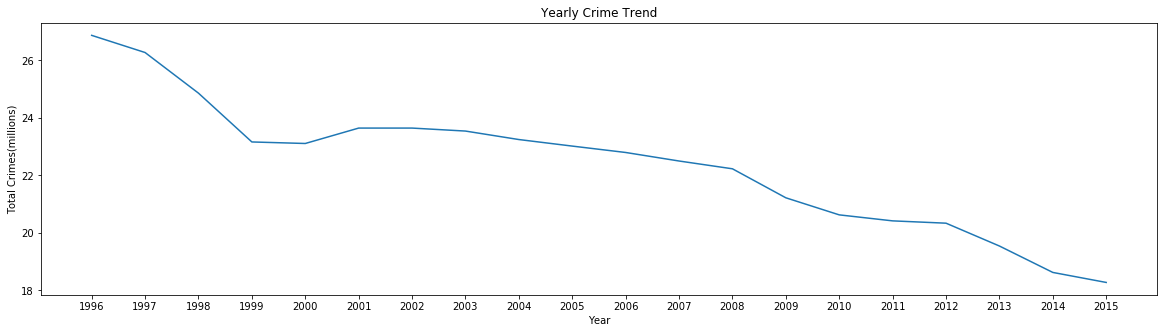

In [ ]:
x = np.array(df_crime_timeseries.Year)
y = np.array(df_crime_timeseries.TotalCrimes)

plt.rcParams['figure.figsize'] = (20, 5)
plt.xticks(x)
plt.ticklabel_format(style='plain',axis='x',useOffset=False)
plt.plot(x,y)
plt.title("Yearly Crime Trend")
plt.xlabel("Year")
plt.ylabel("Total Crimes(millions)")


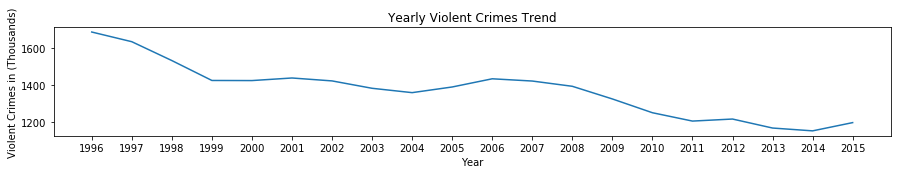

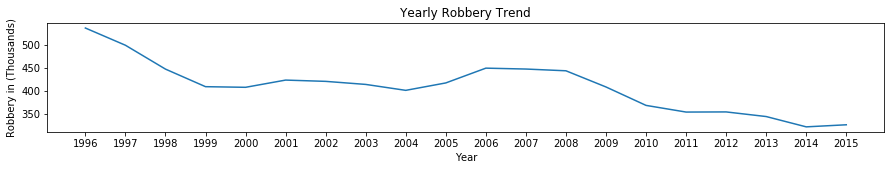

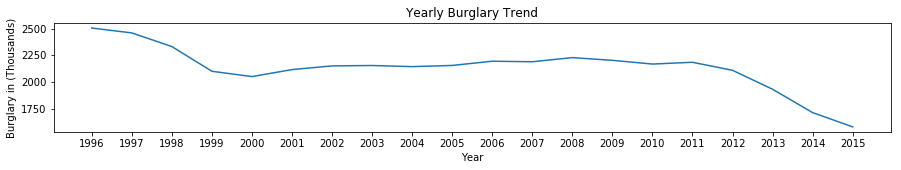

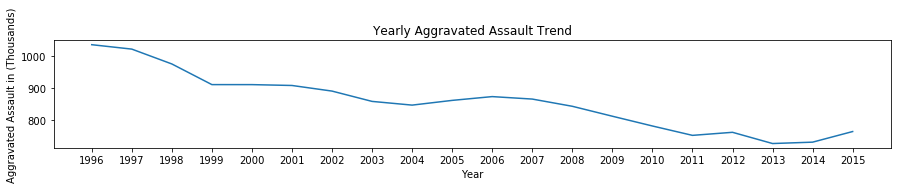

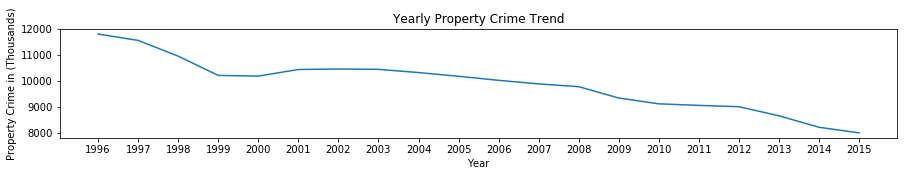

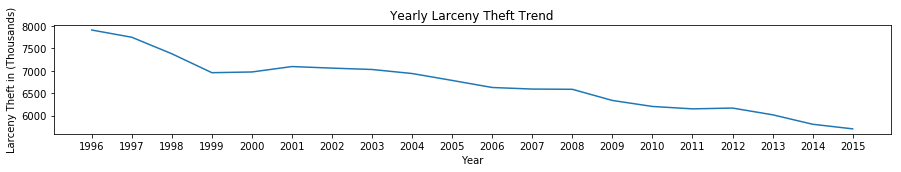

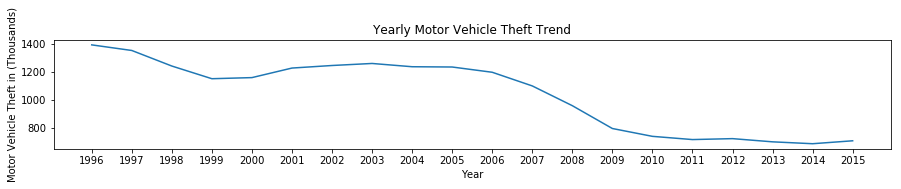

In [ ]:
x = np.array(df_crime_timeseries.Year)
plt.rcParams['figure.figsize'] = (15, 2)
plt.xticks(x)
#plt.ticklabel_format(style='plain',axis='x',useOffset=False)
y_vc = np.array(df_crime_timeseries[['ViolentCrime']])
y_vc = y_vc/1000
y_rob = np.array(df_crime_timeseries[['Robbery']])
y_rob = y_rob /1000
y_prop = np.array(df_crime_timeseries[['PropertyCrime']])
y_prop = y_prop/1000
y_bur = np.array(df_crime_timeseries[['Burglary']])
y_bur = y_bur/1000
y_mv = np.array(df_crime_timeseries[['MotorVehicleTheft']])
y_mv = y_mv/1000
y_Assault = np.array(df_crime_timeseries[['AggravatedAssault']])
y_Assault = y_Assault/1000
y_ltheft = np.array(df_crime_timeseries[['LarcenyTheft']])
y_ltheft = y_ltheft/1000

#plt.plot(x,y_ltheft,x,y_vc,x,y_rob,x,y_bur,x,y_Assault,x,y_prop,x,y_mv)
plt.plot(x,y_vc)
plt.title("Yearly Violent Crimes Trend")
plt.xlabel("Year")
plt.ylabel("Violent Crimes in (Thousands)")
plt.show()
plt.xticks(x)
plt.plot(x,y_rob)
plt.title("Yearly Robbery Trend")
plt.xlabel("Year")
plt.ylabel("Robbery in (Thousands)")
plt.show()
plt.xticks(x)
plt.plot(x,y_bur)
plt.title("Yearly Burglary Trend")
plt.xlabel("Year")
plt.ylabel("Burglary in (Thousands)")
plt.show()
plt.xticks(x)
plt.plot(x,y_Assault)
plt.title("Yearly Aggravated Assault Trend")
plt.xlabel("Year")
plt.ylabel("Aggravated Assault in (Thousands)")
plt.show()
plt.xticks(x)
plt.title("Yearly Property Crime Trend")
plt.xlabel("Year")
plt.ylabel("Property Crime in (Thousands)")
plt.plot(x,y_prop)
plt.show()
plt.xticks(x)
plt.plot(x,y_ltheft)
plt.title("Yearly Larceny Theft Trend")
plt.xlabel("Year")
plt.ylabel("Larceny Theft in (Thousands)")
plt.show()
plt.xticks(x)
plt.plot(x,y_mv)
plt.title("Yearly Motor Vehicle Theft Trend")
plt.xlabel("Year")
plt.ylabel("Motor Vehicle Theft in (Thousands)")
plt.show()


# Use Case - Metro vs Non Metro

In [ ]:
df_crime_2016

,State,Area,Unnamed: 2,Population,Violent crime1,Murder and nonnegligent manslaughter,Rape (revised definition2),Rape (legacy definition3),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Unnamed: 14,Unnamed: 15
0,ALABAMA,Metropolitan Statistical Area,NaN,3716889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,Metropolitan Statistical Area,Area actually reporting,0.992,20793,331,1489.0,1084.0,4174.0,14799,114605,26966,78072.0,9567.0,NaN,NaN
2,ALABAMA,Metropolitan Statistical Area,Estimated total,1,20949,332,1498.0,1091.0,4200.0,14919,115564,27156,78771.0,9637.0,NaN,NaN
3,ALABAMA,Cities outside metropolitan areas,NaN,520422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,Cities outside metropolitan areas,Area actually reporting,0.966,3551,41,263.0,187.0,410.0,2837,19841,4173,14332.0,1336.0,NaN,
5,ALABAMA,Cities outside metropolitan areas,Estimated total,1,3646,42,269.0,193.0,421.0,2914,20291,4275,14641.0,1375.0,NaN,NaN
6,ALABAMA,Nonmetropolitan counties,NaN,625989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ALABAMA,Nonmetropolitan counties,Area actually reporting,0.945,1220,31,141.0,95.0,61.0,987,7096,2490,3934.0,672.0,NaN,NaN
8,ALABAMA,Nonmetropolitan counties,Estimated total,1,1291,33,149.0,101.0,65.0,1044,7507,2634,4162.0,711.0,NaN,NaN
9,ALABAMA,State Total,NaN,4863300,25886,407,1916.0,1385.0,4686.0,18877,143362,34065,97574.0,11723.0,NaN,NaN


In [ ]:
# dropping the last 8 rows as they are just comments
df_crime_2016.drop(df_crime_2016.tail(8).index, inplace=True)

# Filling the NaN values with zero
df_crime_2016=df_crime_2016.fillna(0)

# Dropping columns with NaN value
del df_crime_2016['Unnamed: 14']
del df_crime_2016['Unnamed: 15']

In [ ]:
# df_crime_2016.columns

In [ ]:
# Renaming the columns for ease of use

df_crime_2016 = df_crime_2016.rename(columns={'Violent\ncrime1': 'ViolentCrime',
                                                          'Murder and \nnonnegligent \nmanslaughter': 'Murder',
                                                          'Rape\n(revised\ndefinition2) ':'Rape1',
                                                          'Rape\n(legacy\ndefinition3)':'Rape2',
                                                          'Aggravated \nassault': 'AggravatedAssault',
                                                            'Larceny-\ntheft': 'LarcenyTheft',
                                                            'Property \ncrime': 'PropertyCrime',
                                                            'Motor \nvehicle \ntheft': 'MotorVehicleTheft' })

df_crime_2016.columns

Index(['State', 'Area', 'Unnamed: 2', 'Population', 'ViolentCrime', 'Murder',
       'Rape1', 'Rape2', 'Robbery', 'AggravatedAssault', 'PropertyCrime',
       'Burglary', 'LarcenyTheft', 'MotorVehicleTheft'],
      dtype='object')

In [ ]:
# df_crime_2016

In [ ]:
# Converting the numbers to Numerical value

df_crime_2016['ViolentCrime'] = df_crime_2016['ViolentCrime'].convert_objects(convert_numeric=True)
df_crime_2016['Murder'] = df_crime_2016['Murder'].convert_objects(convert_numeric=True)
df_crime_2016['Rape1'] = df_crime_2016['Rape1'].convert_objects(convert_numeric=True)
df_crime_2016['Rape2'] = df_crime_2016['Rape2'].convert_objects(convert_numeric=True)
df_crime_2016['Robbery'] = df_crime_2016['Robbery'].convert_objects(convert_numeric=True)
df_crime_2016['AggravatedAssault'] = df_crime_2016['AggravatedAssault'].convert_objects(convert_numeric=True)
df_crime_2016['PropertyCrime'] = df_crime_2016['PropertyCrime'].convert_objects(convert_numeric=True)
df_crime_2016['Burglary'] = df_crime_2016['Burglary'].convert_objects(convert_numeric=True)
df_crime_2016['LarcenyTheft'] = df_crime_2016['LarcenyTheft'].convert_objects(convert_numeric=True)
df_crime_2016['MotorVehicleTheft'] = df_crime_2016['MotorVehicleTheft'].convert_objects(convert_numeric=True)
df_crime_2016['Population'] = df_crime_2016['Population'].convert_objects(convert_numeric=True)



/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.
/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/Muhamm

In [ ]:
# df_crime_2016

In [ ]:
# Saperating the Metropolitan area and taking only the actually reported crime values

df_crime_metro=df_crime_2016.loc[(df_crime_2016['Area'] == "Metropolitan Statistical Area") & (df_crime_2016['Unnamed: 2'] == "Area actually reporting")]
df_crime_metro.index = df_crime_metro['State']
del df_crime_metro['Population']

df_crime_metro_population=df_crime_2016.loc[(df_crime_2016['Area'] == "Metropolitan Statistical Area") & (df_crime_2016['Unnamed: 2'] == 0)]
df_crime_metro_population.index = df_crime_metro_population['State']
df_crime_metro_population.drop(['State', 'Area', 'Unnamed: 2', 'ViolentCrime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'AggravatedAssault', 'PropertyCrime', 'Burglary', 'LarcenyTheft', 'MotorVehicleTheft'], axis=1, inplace=True)

df_crime_metro = pd.merge(df_crime_metro, df_crime_metro_population, right_index=True, left_index=True)

# df_crime_metro = df_crime_metro.sort_values(by='Population', ascending=0)
# df_crime_metro

/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
# Saperating the Cities outside Metropolitan area and taking only the actually reported crime values

df_crime_cities=df_crime_2016.loc[(df_crime_2016['Area'] == "Cities outside metropolitan areas") & (df_crime_2016['Unnamed: 2'] == "Area actually reporting")]
df_crime_cities.index = df_crime_cities['State']
del df_crime_cities['Population']

df_crime_cities_population=df_crime_2016.loc[(df_crime_2016['Area'] == "Cities outside metropolitan areas") & (df_crime_2016['Unnamed: 2'] == 0)]
df_crime_cities_population.index = df_crime_cities_population['State']
df_crime_cities_population.drop(['State', 'Area', 'Unnamed: 2', 'ViolentCrime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'AggravatedAssault', 'PropertyCrime', 'Burglary', 'LarcenyTheft', 'MotorVehicleTheft'], axis=1, inplace=True)

df_crime_cities = pd.merge(df_crime_cities, df_crime_cities_population, right_index=True, left_index=True)


# df_crime_cities = df_crime_cities.sort_values(by='Population', ascending=0)
# df_crime_cities

/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
# Saperating the Non-Metropolitan area and taking only the actually reported crime values

df_crime_nonmetro=df_crime_2016.loc[(df_crime_2016['Area'] == "Nonmetropolitan counties") & (df_crime_2016['Unnamed: 2'] == "Area actually reporting")]
df_crime_nonmetro.index = df_crime_nonmetro['State']
del df_crime_nonmetro['Population']

df_crime_nonmetro_population=df_crime_2016.loc[(df_crime_2016['Area'] == "Nonmetropolitan counties") & (df_crime_2016['Unnamed: 2'] == 0)]
df_crime_nonmetro_population.index = df_crime_nonmetro_population['State']
df_crime_nonmetro_population.drop(['State', 'Area', 'Unnamed: 2', 'ViolentCrime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'AggravatedAssault', 'PropertyCrime', 'Burglary', 'LarcenyTheft', 'MotorVehicleTheft'], axis=1, inplace=True)

df_crime_nonmetro = pd.merge(df_crime_nonmetro, df_crime_nonmetro_population, right_index=True, left_index=True)

# df_crime_nonmetro = df_crime_nonmetro.sort_values(by='Population', ascending=0)

# df_crime_nonmetro

/Users/Muhammad/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
# Saperating the Total crime values by state and renaming the columns for ease of use

df_crime_total=df_crime_2016.loc[(df_crime_2016['Area'] == "State Total") & (df_crime_2016['Unnamed: 2'] == 0)]
df_crime_total.index = df_crime_total['State']
del df_crime_total['Area']
df_crime_total = df_crime_total.rename(columns={'Population' : 'TotalPopulation',
                                              'ViolentCrime': 'TotalViolentCrime',
                                                'Murder': 'TotalMurder',
                                                'Rape1':'TotalRape1',
                                                'Rape2':'TotalRape2',
                                              'Robbery':'TotalRobbery',
                                                'AggravatedAssault': 'TotalAggravatedAssault',
                                               'PropertyCrime': 'TotalPropertyCrime',
                                                'LarcenyTheft': 'TotalLarcenyTheft',
                                                'Burglary': 'TotalBurglary',
                                                'MotorVehicleTheft': 'TotalMotorVehicleTheft' })
 

# df_crime_total = df_crime_total.sort_values(by='TotalPopulation', ascending=0)




In [ ]:
# Calculating the Total Rate of Crime per 1,000 inhabitants

df_crime_total['TotalViolentCrimeRate']= df_crime_total['TotalViolentCrime']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalMurderRate']= df_crime_total['TotalMurder']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalRape1Rate']= df_crime_total['TotalRape1']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalRape2Rate']= df_crime_total['TotalRape2']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalRobberyRate']= df_crime_total['TotalRobbery']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalAggravatedAssaultRate']= df_crime_total['TotalAggravatedAssault']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalPropertyCrimeRate']= df_crime_total['TotalPropertyCrime']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalBurglaryRate']= df_crime_total['TotalBurglary']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalLarcenyTheftRate']= df_crime_total['TotalLarcenyTheft']/df_crime_total['TotalPopulation']*1000
df_crime_total['TotalMotorVehicleTheftRate']= df_crime_total['TotalMotorVehicleTheft']/df_crime_total['TotalPopulation']*1000

# df_crime_total                                              

In [ ]:
# calculating the Percentage of crimes in Metropolitan areas and the Rate of crime in Metropolitan areas Rate per 1,000 inhabitants

df_crime_metro_merged=pd.merge(df_crime_metro, df_crime_total, right_index=True, left_index=True)

df_crime_metro_merged['Metro_ViolentCrimePercentage'] = df_crime_metro_merged['ViolentCrime']/df_crime_metro_merged['TotalViolentCrime']
df_crime_metro_merged['Metro_MurderPercentage'] = df_crime_metro_merged['Murder']/df_crime_metro_merged['TotalMurder']
df_crime_metro_merged['Metro_Rape1Percentage'] = df_crime_metro_merged['Rape1']/df_crime_metro_merged['TotalRape1']
df_crime_metro_merged['Metro_Rape2Percentage'] = df_crime_metro_merged['Rape2']/df_crime_metro_merged['TotalRape2']
df_crime_metro_merged['Metro_RobberyPercentage'] = df_crime_metro_merged['Robbery']/df_crime_metro_merged['TotalRobbery']
df_crime_metro_merged['Metro_AggravatedAssaultPercentage'] = df_crime_metro_merged['AggravatedAssault']/df_crime_metro_merged['TotalAggravatedAssault']
df_crime_metro_merged['Metro_PropertyCrimePercentage'] = df_crime_metro_merged['PropertyCrime']/df_crime_metro_merged['TotalPropertyCrime']
df_crime_metro_merged['Metro_BurglaryPercentage'] = df_crime_metro_merged['Burglary']/df_crime_metro_merged['TotalBurglary']
df_crime_metro_merged['Metro_LarcenyTheftPercentage'] = df_crime_metro_merged['LarcenyTheft']/df_crime_metro_merged['TotalLarcenyTheft']
df_crime_metro_merged['Metro_MotorVehicleTheftPercentage'] = df_crime_metro_merged['MotorVehicleTheft']/df_crime_metro_merged['TotalMotorVehicleTheft']

df_crime_metro_merged['Metro_ViolentCrimeRate'] = df_crime_metro_merged['ViolentCrime']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_MurderRate'] = df_crime_metro_merged['Murder']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_Rape1Rate'] = df_crime_metro_merged['Rape1']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_Rape2Rate'] = df_crime_metro_merged['Rape2']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_RobberyRate'] = df_crime_metro_merged['Robbery']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_AggravatedAssaultRate'] = df_crime_metro_merged['AggravatedAssault']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_PropertyCrimeRate'] = df_crime_metro_merged['PropertyCrime']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_BurglaryRate'] = df_crime_metro_merged['Burglary']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_LarcenyTheftRate'] = df_crime_metro_merged['LarcenyTheft']/df_crime_metro_merged['Population']*1000
df_crime_metro_merged['Metro_MotorVehicleTheftRate'] = df_crime_metro_merged['MotorVehicleTheft']/df_crime_metro_merged['Population']*1000

# df_crime_metro_merged

In [ ]:
# calculating the Percentage of crimes in Cities outside Metropolitan areas and the Rate of crime in Cities outside Metropolitan areas Rate per 1,000 inhabitants


df_crime_cities_merged=pd.merge(df_crime_cities, df_crime_total, right_index=True, left_index=True)

df_crime_cities_merged['City_ViolentCrimePercentage'] = df_crime_cities_merged['ViolentCrime']/df_crime_cities_merged['TotalViolentCrime']
df_crime_cities_merged['City_MurderPercentage'] = df_crime_cities_merged['Murder']/df_crime_cities_merged['TotalMurder']
df_crime_cities_merged['City_Rape1Percentage'] = df_crime_cities_merged['Rape1']/df_crime_cities_merged['TotalRape1']
df_crime_cities_merged['City_Rape2Percentage'] = df_crime_cities_merged['Rape2']/df_crime_cities_merged['TotalRape2']
df_crime_cities_merged['City_RobberyPercentage'] = df_crime_cities_merged['Robbery']/df_crime_cities_merged['TotalRobbery']
df_crime_cities_merged['City_AggravatedAssaultPercentage'] = df_crime_cities_merged['AggravatedAssault']/df_crime_cities_merged['TotalAggravatedAssault']
df_crime_cities_merged['City_PropertyCrimePercentage'] = df_crime_cities_merged['PropertyCrime']/df_crime_cities_merged['TotalPropertyCrime']
df_crime_cities_merged['City_BurglaryPercentage'] = df_crime_cities_merged['Burglary']/df_crime_cities_merged['TotalBurglary']
df_crime_cities_merged['City_LarcenyTheftPercentage'] = df_crime_cities_merged['LarcenyTheft']/df_crime_cities_merged['TotalLarcenyTheft']
df_crime_cities_merged['City_MotorVehicleTheftPercentage'] = df_crime_cities_merged['MotorVehicleTheft']/df_crime_cities_merged['TotalMotorVehicleTheft']

df_crime_cities_merged['City_ViolentCrimeRate'] = df_crime_cities_merged['ViolentCrime']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_MurderRate'] = df_crime_cities_merged['Murder']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_Rape1Rate'] = df_crime_cities_merged['Rape1']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_Rape2Rate'] = df_crime_cities_merged['Rape2']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_RobberyRate'] = df_crime_cities_merged['Robbery']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_AggravatedAssaultRate'] = df_crime_cities_merged['AggravatedAssault']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_PropertyCrimeRate'] = df_crime_cities_merged['PropertyCrime']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_BurglaryRate'] = df_crime_cities_merged['Burglary']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_LarcenyTheftRate'] = df_crime_cities_merged['LarcenyTheft']/df_crime_cities_merged['Population']*1000
df_crime_cities_merged['City_MotorVehicleTheftRate'] = df_crime_cities_merged['MotorVehicleTheft']/df_crime_cities_merged['Population']*1000



# df_crime_cities_merged


In [ ]:
# calculating the Percentage of crimes in NonMetropolitan areas and the Rate of crime in NonMetropolitan areas Rate per 1,000 inhabitants


df_crime_nonmetro_merged=pd.merge(df_crime_nonmetro, df_crime_total, right_index=True, left_index=True)

df_crime_nonmetro_merged['NonMetro_ViolentCrimePercentage'] = df_crime_nonmetro_merged['ViolentCrime']/df_crime_nonmetro_merged['TotalViolentCrime']
df_crime_nonmetro_merged['NonMetro_MurderPercentage'] = df_crime_nonmetro_merged['Murder']/df_crime_nonmetro_merged['TotalMurder']
df_crime_nonmetro_merged['NonMetro_Rape1Percentage'] = df_crime_nonmetro_merged['Rape1']/df_crime_nonmetro_merged['TotalRape1']
df_crime_nonmetro_merged['NonMetro_Rape2Percentage'] = df_crime_nonmetro_merged['Rape2']/df_crime_nonmetro_merged['TotalRape2']
df_crime_nonmetro_merged['NonMetro_RobberyPercentage'] = df_crime_nonmetro_merged['Robbery']/df_crime_nonmetro_merged['TotalRobbery']
df_crime_nonmetro_merged['NonMetro_AggravatedAssaultPercentage'] = df_crime_nonmetro_merged['AggravatedAssault']/df_crime_nonmetro_merged['TotalAggravatedAssault']
df_crime_nonmetro_merged['NonMetro_PropertyCrimePercentage'] = df_crime_nonmetro_merged['PropertyCrime']/df_crime_nonmetro_merged['TotalPropertyCrime']
df_crime_nonmetro_merged['NonMetro_BurglaryPercentage'] = df_crime_nonmetro_merged['Burglary']/df_crime_nonmetro_merged['TotalBurglary']
df_crime_nonmetro_merged['NonMetro_LarcenyTheftPercentage'] = df_crime_nonmetro_merged['LarcenyTheft']/df_crime_nonmetro_merged['TotalLarcenyTheft']
df_crime_nonmetro_merged['NonMetro_MotorVehicleTheftPercentage'] = df_crime_nonmetro_merged['MotorVehicleTheft']/df_crime_nonmetro_merged['TotalMotorVehicleTheft']

df_crime_nonmetro_merged['NonMetro_ViolentCrimeRate'] = df_crime_nonmetro_merged['ViolentCrime']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_MurderRate'] = df_crime_nonmetro_merged['Murder']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_Rape1Rate'] = df_crime_nonmetro_merged['Rape1']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_Rape2Rate'] = df_crime_nonmetro_merged['Rape2']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_RobberyRate'] = df_crime_nonmetro_merged['Robbery']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_AggravatedAssaultRate'] = df_crime_nonmetro_merged['AggravatedAssault']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_PropertyCrimeRate'] = df_crime_nonmetro_merged['PropertyCrime']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_BurglaryRate'] = df_crime_nonmetro_merged['Burglary']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_LarcenyTheftRate'] = df_crime_nonmetro_merged['LarcenyTheft']/df_crime_nonmetro_merged['Population']*1000
df_crime_nonmetro_merged['NonMetro_MotorVehicleTheftRate'] = df_crime_nonmetro_merged['MotorVehicleTheft']/df_crime_nonmetro_merged['Population']*1000


# df_crime_nonmetro_merged

# Violent Crime

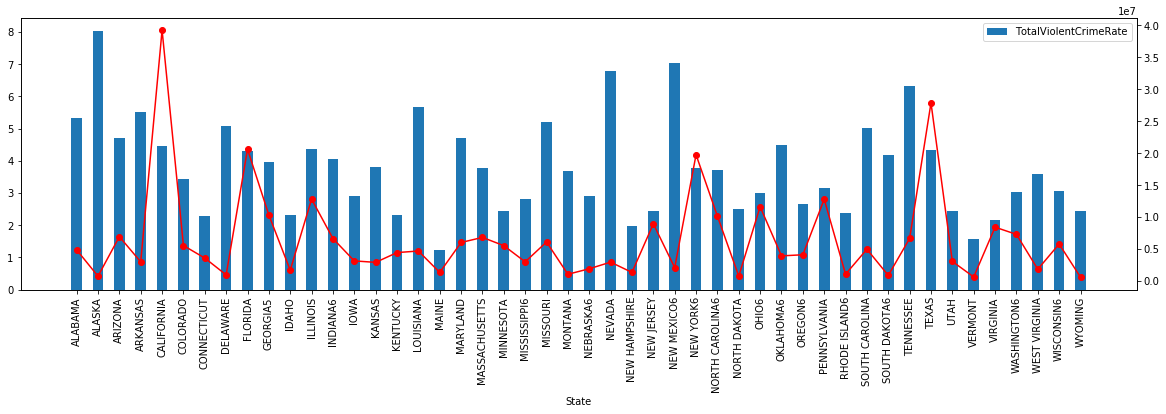

In [ ]:
# Population vs Total Violent Crime rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalViolentCrimeRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

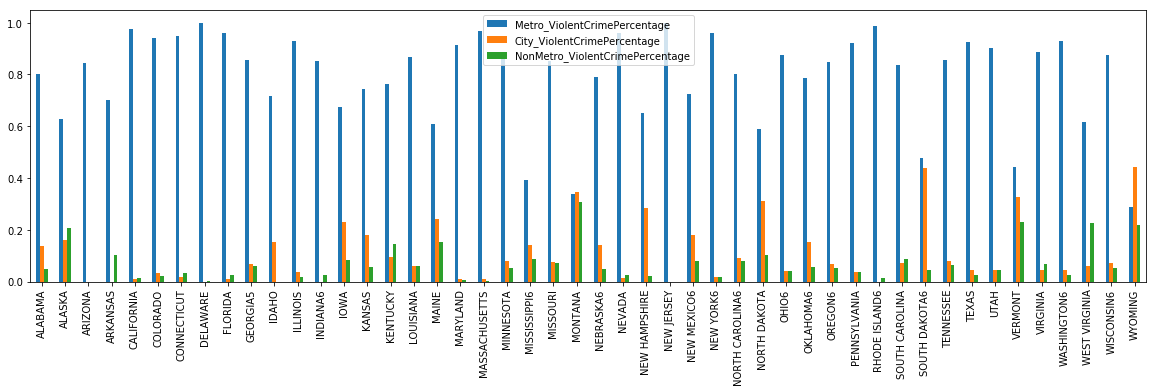

In [ ]:
# Percentage of Violent Crime in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

ViolentCrimePercentage=pd.concat([df_crime_metro_merged["Metro_ViolentCrimePercentage"], df_crime_cities_merged["City_ViolentCrimePercentage"], df_crime_nonmetro_merged['NonMetro_ViolentCrimePercentage'] ], axis=1)

fig = plt.figure()       
ax = ViolentCrimePercentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

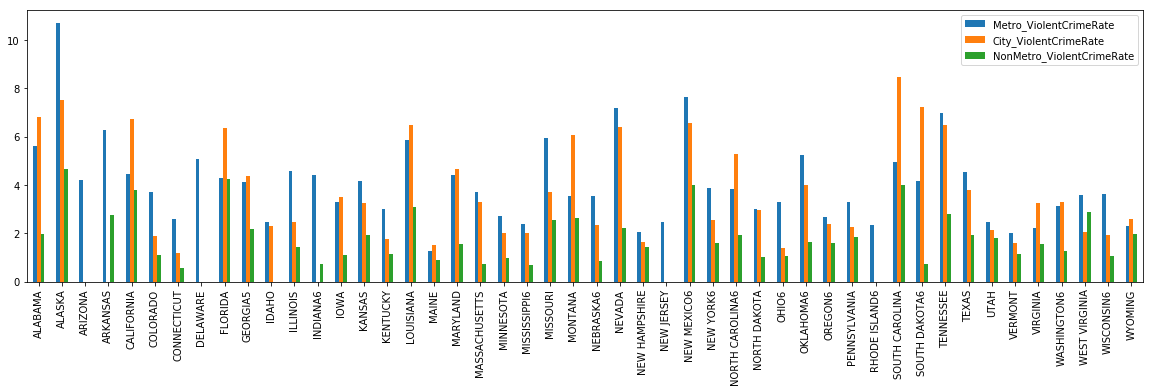

In [ ]:
# Violent Crime Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

ViolentCrimeRate=pd.concat([df_crime_metro_merged["Metro_ViolentCrimeRate"], df_crime_cities_merged["City_ViolentCrimeRate"], df_crime_nonmetro_merged['NonMetro_ViolentCrimeRate'] ], axis=1)

fig = plt.figure()       
ax = ViolentCrimeRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# Murder

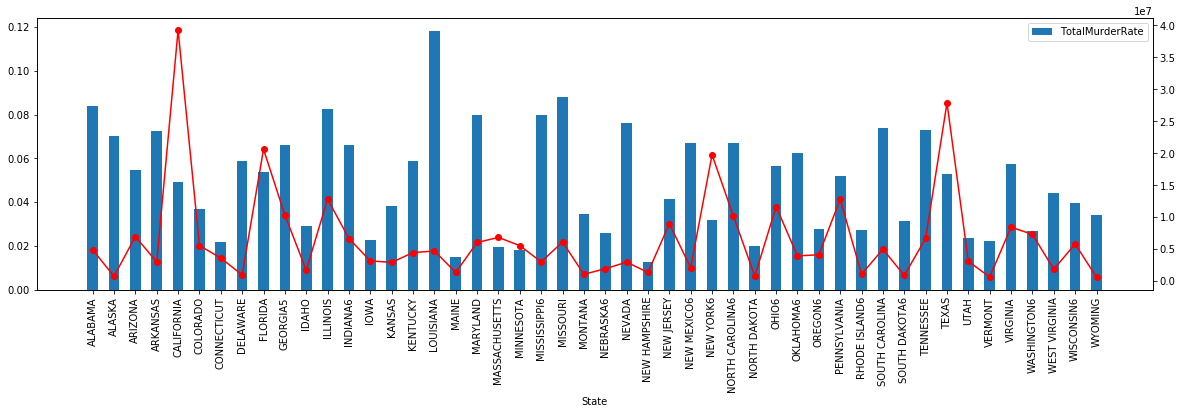

In [ ]:
# Population vs Total Murder Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalMurderRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

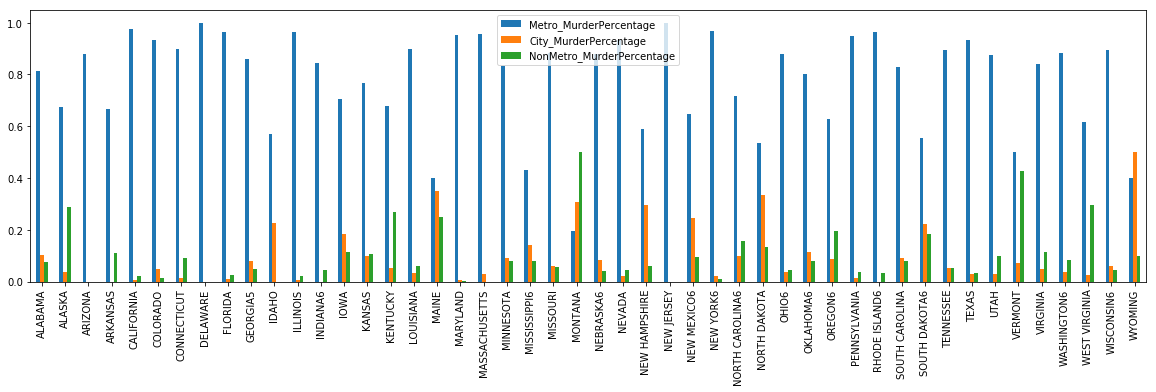

In [ ]:
# Percentage of Murder in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

MurderPercentage=pd.concat([df_crime_metro_merged["Metro_MurderPercentage"], df_crime_cities_merged["City_MurderPercentage"], df_crime_nonmetro_merged['NonMetro_MurderPercentage'] ], axis=1)

fig = plt.figure()       
ax = MurderPercentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

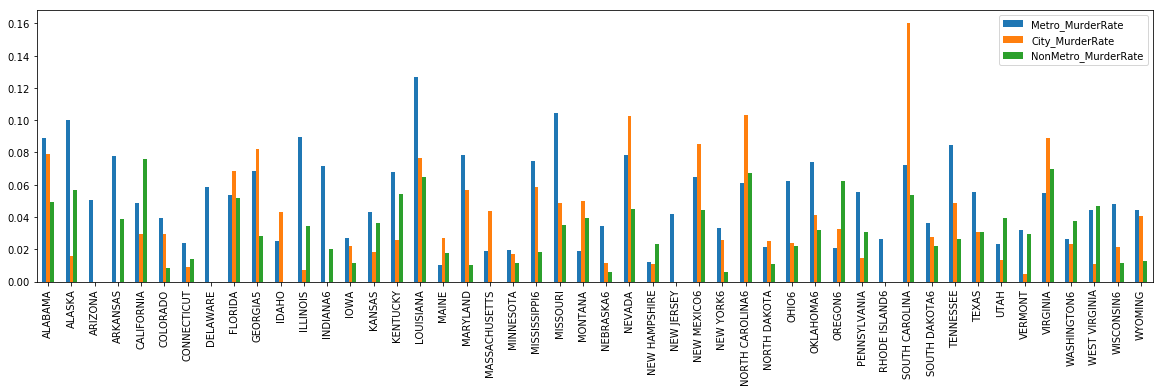

In [ ]:
# Murder Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

MurderRate=pd.concat([df_crime_metro_merged["Metro_MurderRate"], df_crime_cities_merged["City_MurderRate"], df_crime_nonmetro_merged['NonMetro_MurderRate'] ], axis=1)

fig = plt.figure()       
ax = MurderRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# Rape

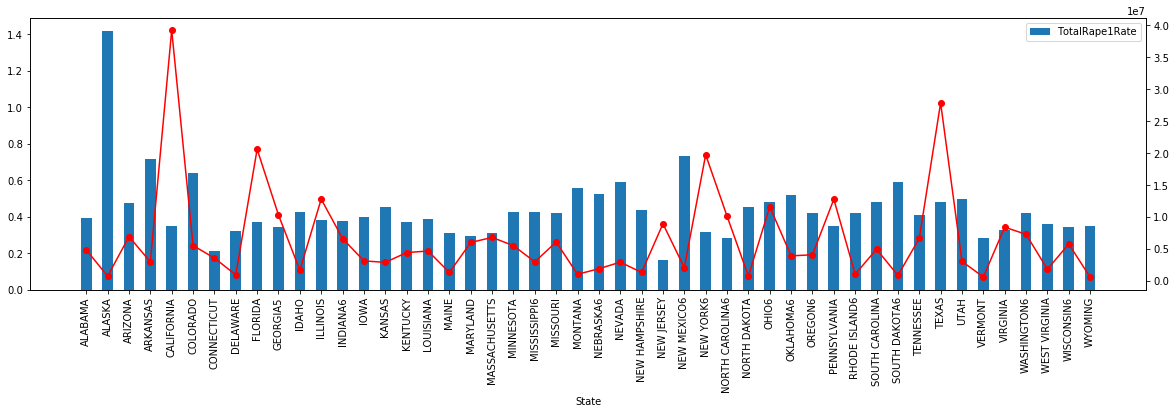

In [ ]:
# Population vs Total Rape Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalRape1Rate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

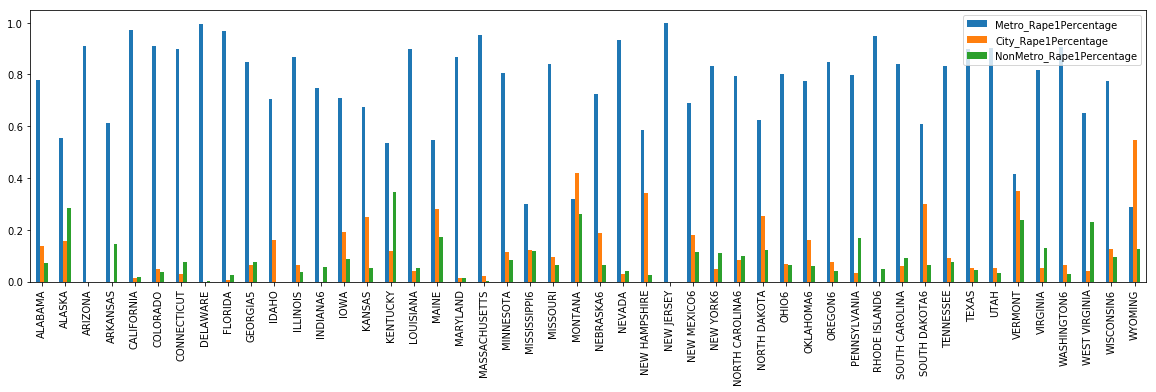

In [ ]:
# Percentage of Rape in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

Rape1Percentage=pd.concat([df_crime_metro_merged["Metro_Rape1Percentage"], df_crime_cities_merged["City_Rape1Percentage"], df_crime_nonmetro_merged['NonMetro_Rape1Percentage'] ], axis=1)

fig = plt.figure()       
ax = Rape1Percentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

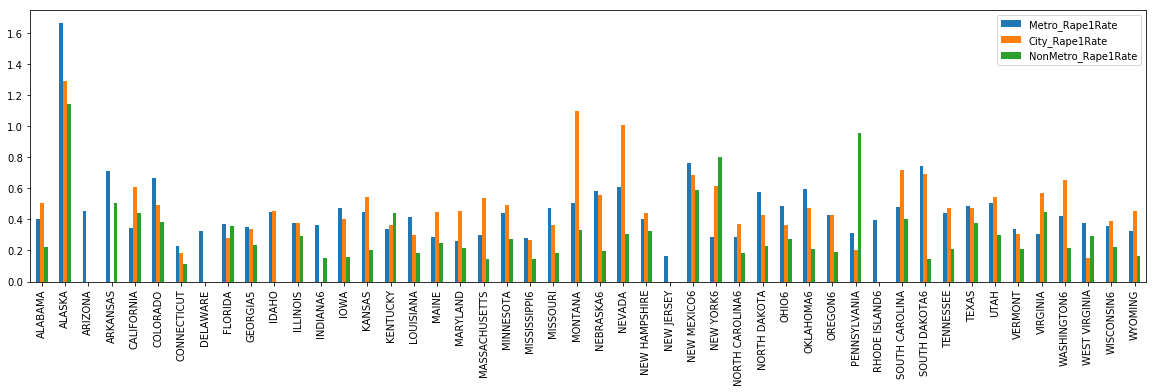

In [ ]:
# Rape Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

Rape1Rate=pd.concat([df_crime_metro_merged["Metro_Rape1Rate"], df_crime_cities_merged["City_Rape1Rate"], df_crime_nonmetro_merged['NonMetro_Rape1Rate'] ], axis=1)

fig = plt.figure()       
ax = Rape1Rate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# Robbery

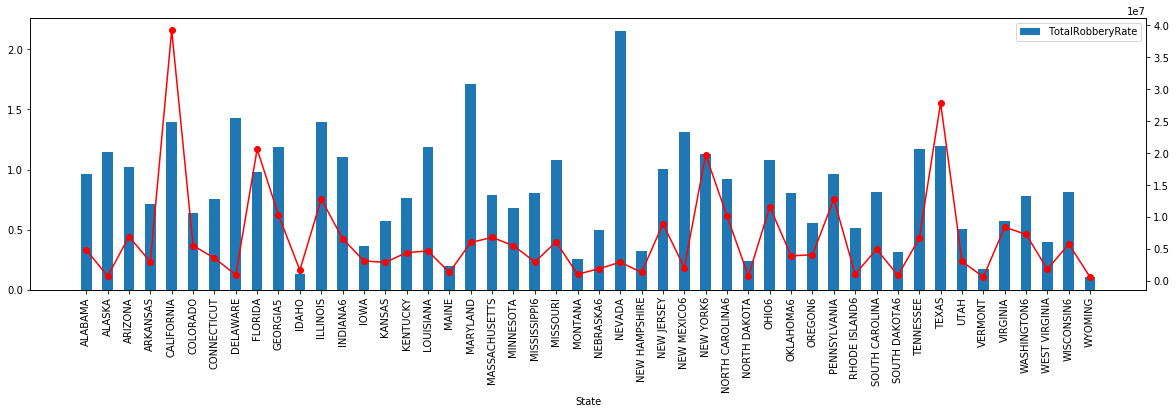

In [ ]:
# Population vs Total Robbery Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalRobberyRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

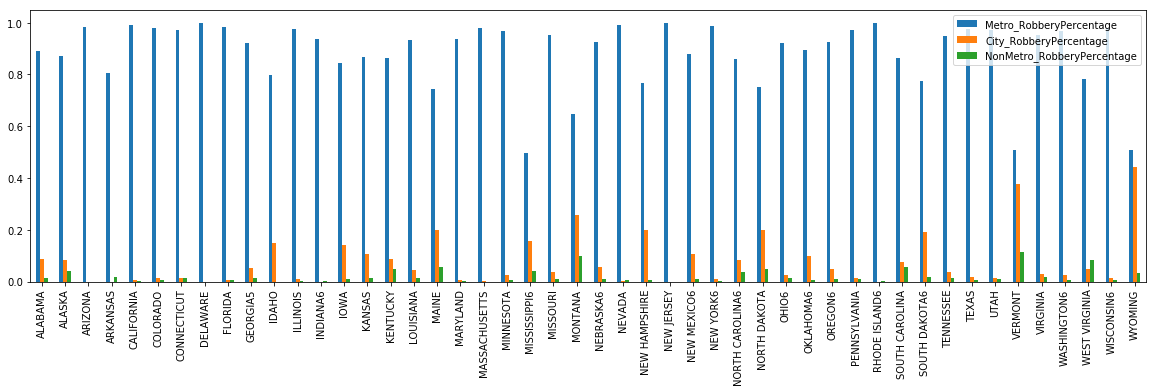

In [ ]:
# Percentage of Robbery in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

RobberyPercentage=pd.concat([df_crime_metro_merged["Metro_RobberyPercentage"], df_crime_cities_merged["City_RobberyPercentage"], df_crime_nonmetro_merged['NonMetro_RobberyPercentage'] ], axis=1)

fig = plt.figure()       
ax = RobberyPercentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

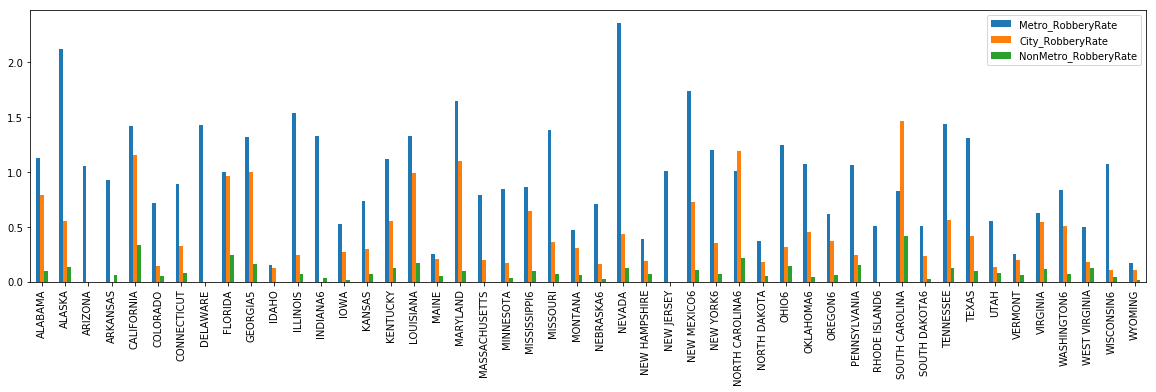

In [ ]:
# Robbery Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

RobberyRate=pd.concat([df_crime_metro_merged["Metro_RobberyRate"], df_crime_cities_merged["City_RobberyRate"], df_crime_nonmetro_merged['NonMetro_RobberyRate'] ], axis=1)

fig = plt.figure()       
ax = RobberyRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# AggravatedAssault

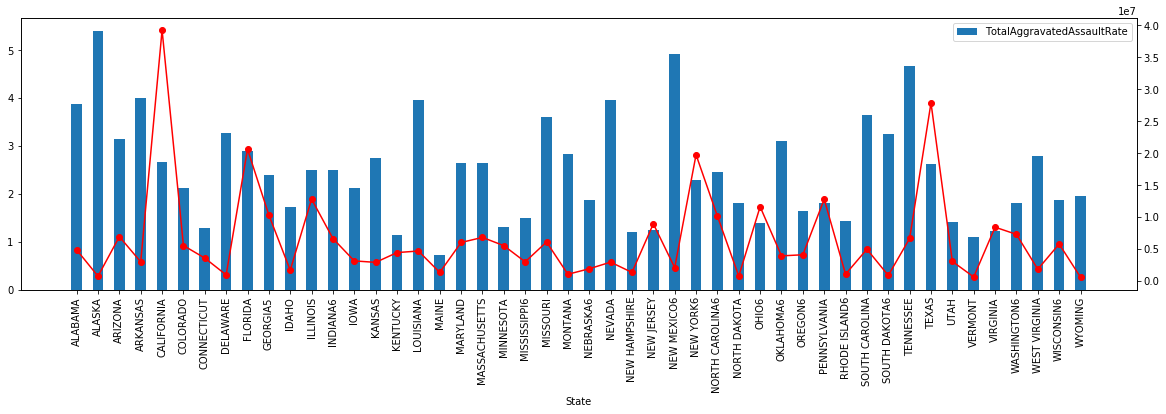

In [ ]:
# Population vs Total Robbery Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalAggravatedAssaultRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

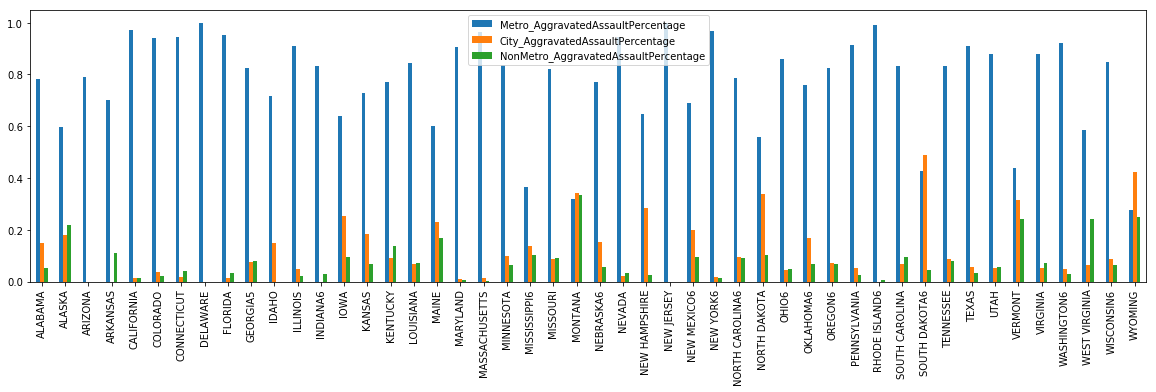

In [ ]:
# Percentage of Robbery in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

AggravatedAssaultPercentage=pd.concat([df_crime_metro_merged["Metro_AggravatedAssaultPercentage"], df_crime_cities_merged["City_AggravatedAssaultPercentage"], df_crime_nonmetro_merged['NonMetro_AggravatedAssaultPercentage'] ], axis=1)

fig = plt.figure()       
ax = AggravatedAssaultPercentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

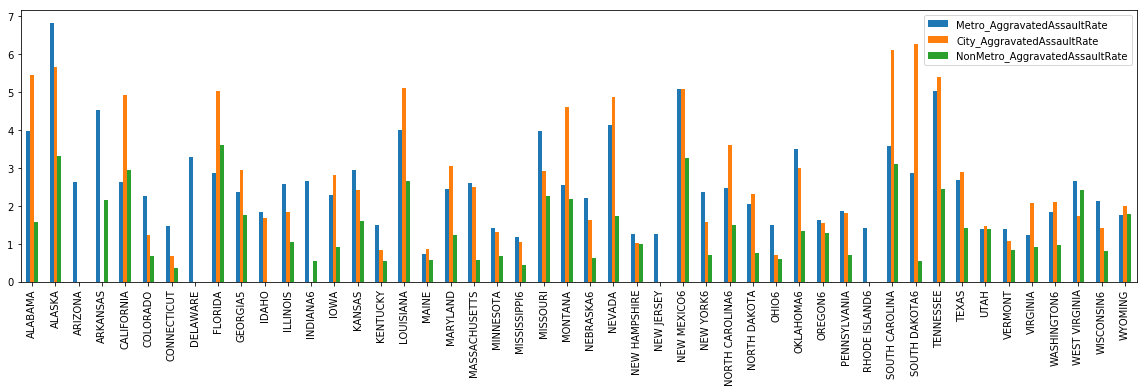

In [ ]:
# Robbery Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

AggravatedAssaultRate=pd.concat([df_crime_metro_merged["Metro_AggravatedAssaultRate"], df_crime_cities_merged["City_AggravatedAssaultRate"], df_crime_nonmetro_merged['NonMetro_AggravatedAssaultRate'] ], axis=1)

fig = plt.figure()       
ax = AggravatedAssaultRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)


plt.show()


# PropertyCrime

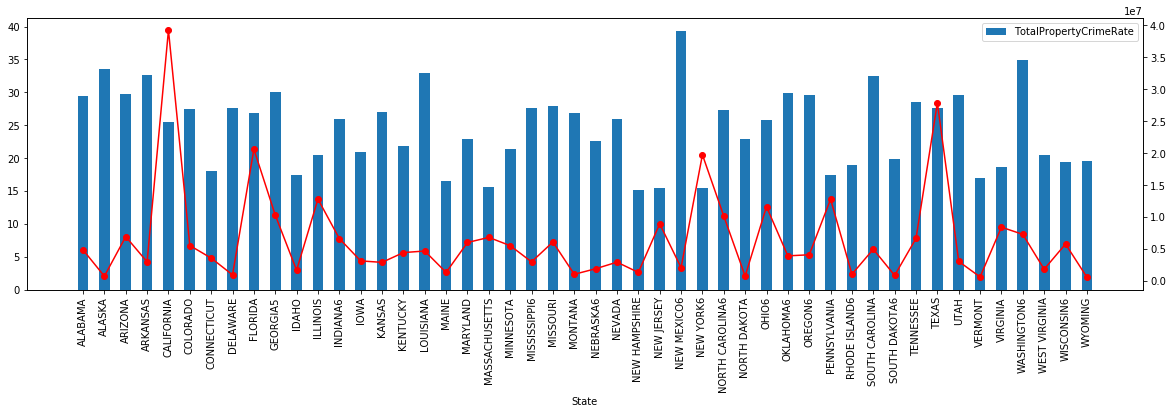

In [ ]:
# Population vs Total Robbery Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalPropertyCrimeRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

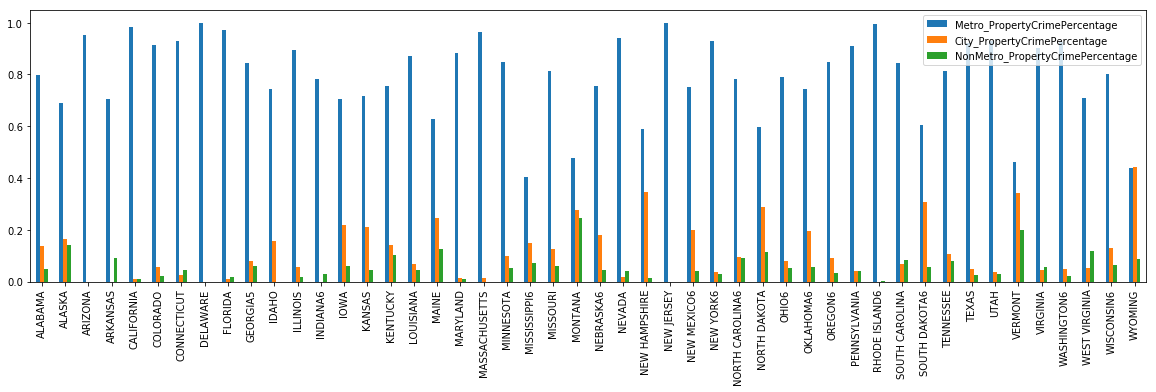

In [ ]:
# Percentage of Robbery in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

Rape1Percentage=pd.concat([df_crime_metro_merged["Metro_PropertyCrimePercentage"], df_crime_cities_merged["City_PropertyCrimePercentage"], df_crime_nonmetro_merged['NonMetro_PropertyCrimePercentage'] ], axis=1)

fig = plt.figure()       
ax = Rape1Percentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

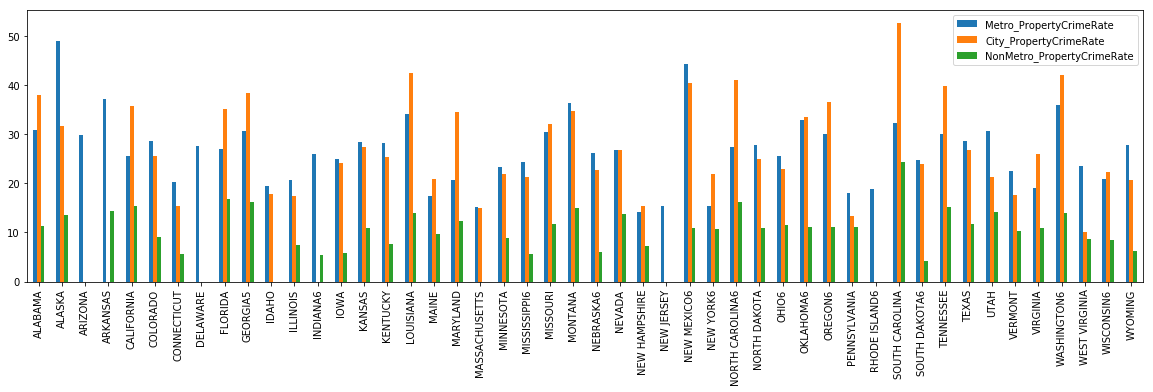

In [ ]:
# Robbery Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

ViolentCrimeRate=pd.concat([df_crime_metro_merged["Metro_PropertyCrimeRate"], df_crime_cities_merged["City_PropertyCrimeRate"], df_crime_nonmetro_merged['NonMetro_PropertyCrimeRate'] ], axis=1)

fig = plt.figure()       
ax = ViolentCrimeRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# Burglary

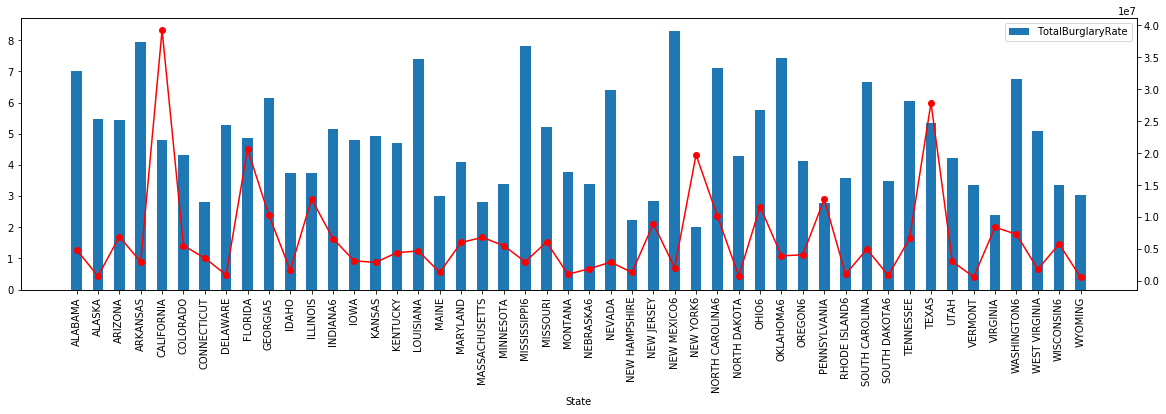

In [ ]:
# Population vs Total Robbery Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalBurglaryRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

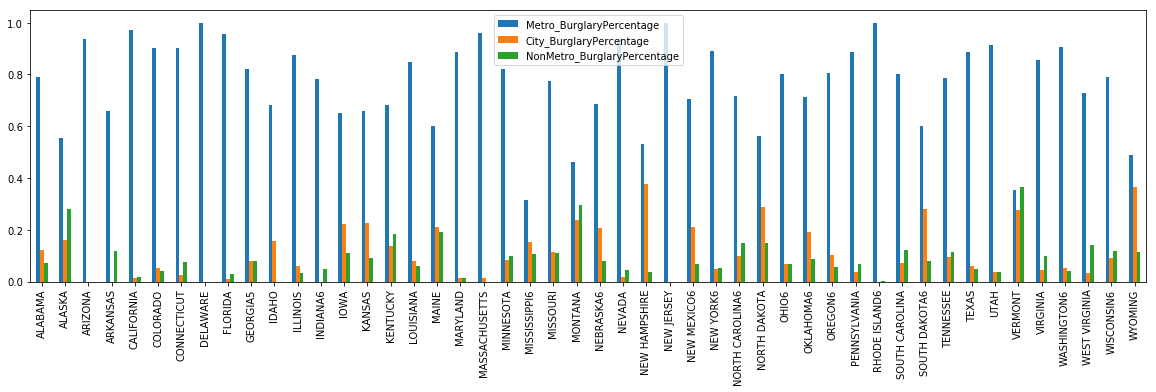

In [ ]:
# Percentage of Robbery in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

Rape1Percentage=pd.concat([df_crime_metro_merged["Metro_BurglaryPercentage"], df_crime_cities_merged["City_BurglaryPercentage"], df_crime_nonmetro_merged['NonMetro_BurglaryPercentage'] ], axis=1)

fig = plt.figure()       
ax = Rape1Percentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

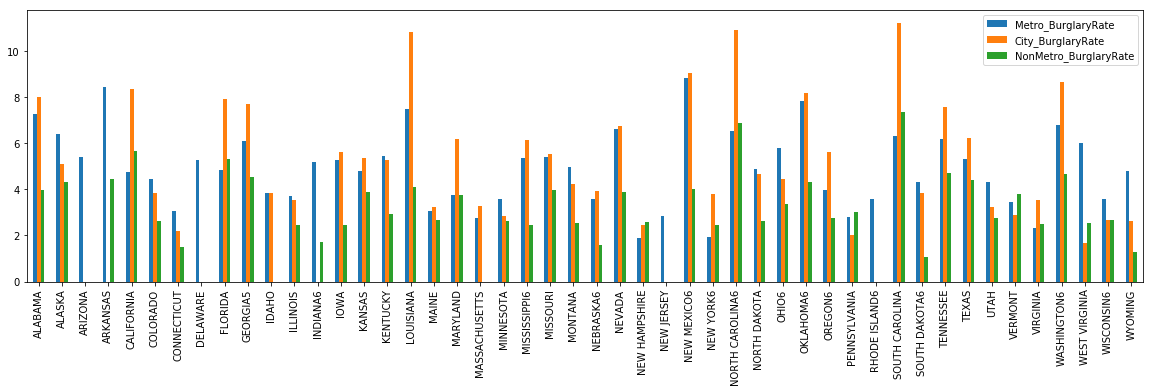

In [ ]:
# Robbery Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

ViolentCrimeRate=pd.concat([df_crime_metro_merged["Metro_BurglaryRate"], df_crime_cities_merged["City_BurglaryRate"], df_crime_nonmetro_merged['NonMetro_BurglaryRate'] ], axis=1)

fig = plt.figure()       
ax = ViolentCrimeRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# LarcenyTheft

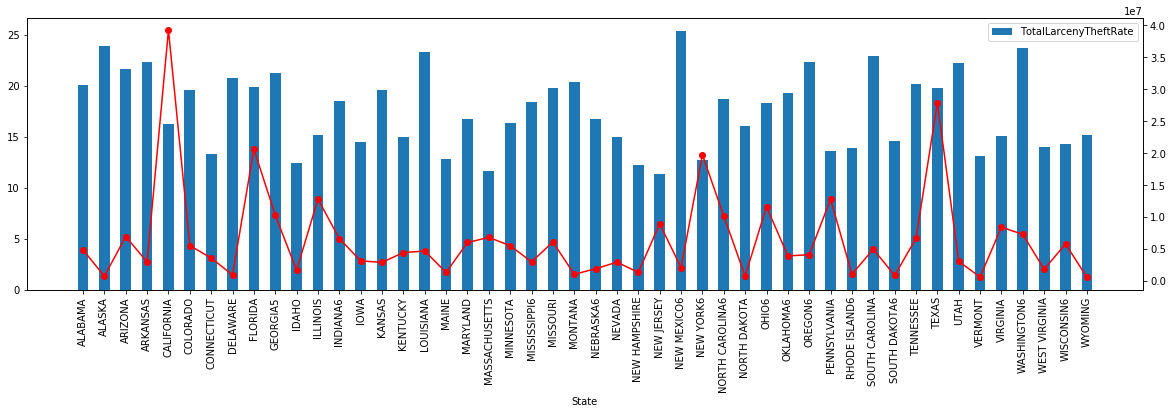

In [ ]:
# Population vs Total Robbery Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalLarcenyTheftRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

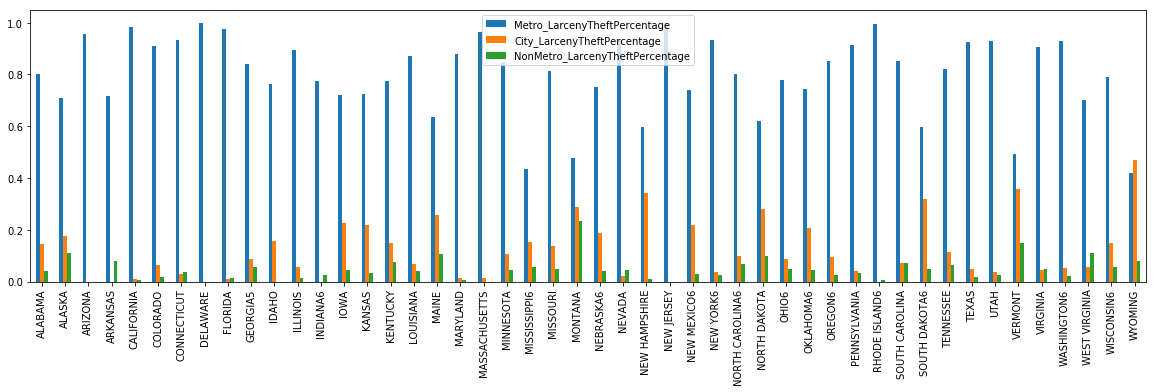

In [ ]:
# Percentage of Robbery in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

Rape1Percentage=pd.concat([df_crime_metro_merged["Metro_LarcenyTheftPercentage"], df_crime_cities_merged["City_LarcenyTheftPercentage"], df_crime_nonmetro_merged['NonMetro_LarcenyTheftPercentage'] ], axis=1)

fig = plt.figure()       
ax = Rape1Percentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

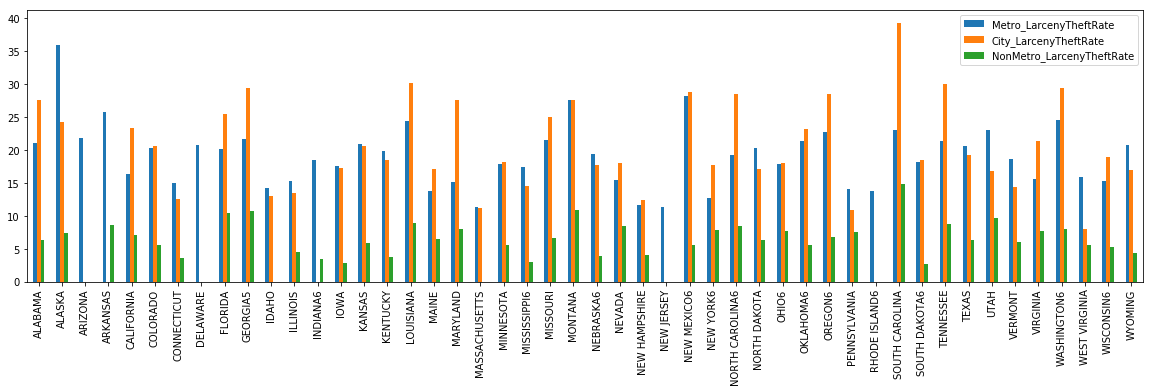

In [ ]:
# Robbery Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

ViolentCrimeRate=pd.concat([df_crime_metro_merged["Metro_LarcenyTheftRate"], df_crime_cities_merged["City_LarcenyTheftRate"], df_crime_nonmetro_merged['NonMetro_LarcenyTheftRate'] ], axis=1)

fig = plt.figure()       
ax = ViolentCrimeRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

# MotorVehicleTheft

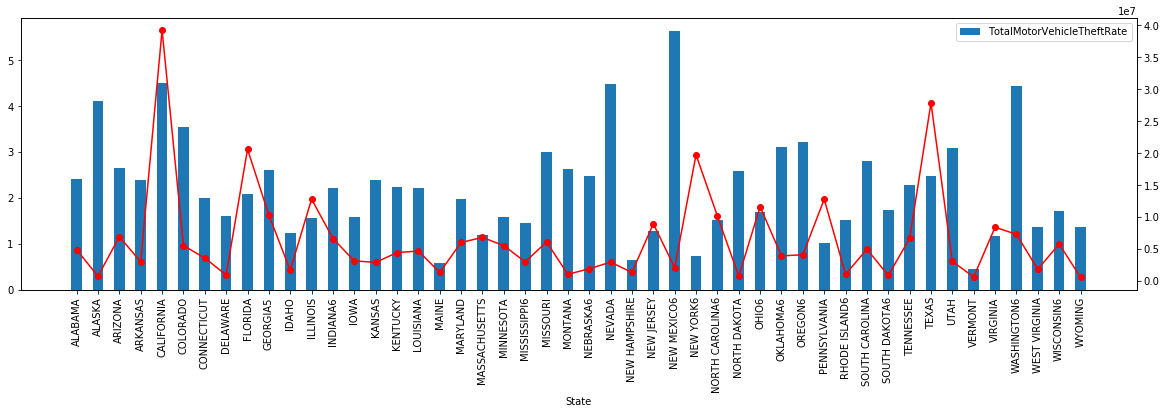

In [ ]:
# Population vs Total Robbery Rate per 1,000 people in each state

fig = plt.figure()       
ax = df_crime_total[['State', 'TotalMotorVehicleTheftRate']].plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df_crime_total.TotalPopulation, marker='o', color='red')
plt.show()

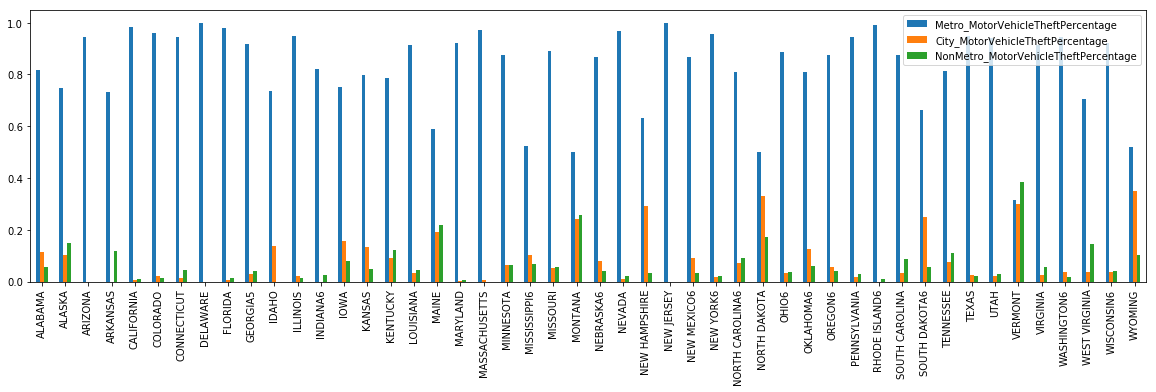

In [ ]:
# Percentage of Robbery in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

Rape1Percentage=pd.concat([df_crime_metro_merged["Metro_MotorVehicleTheftPercentage"], df_crime_cities_merged["City_MotorVehicleTheftPercentage"], df_crime_nonmetro_merged['NonMetro_MotorVehicleTheftPercentage'] ], axis=1)

fig = plt.figure()       
ax = Rape1Percentage.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()

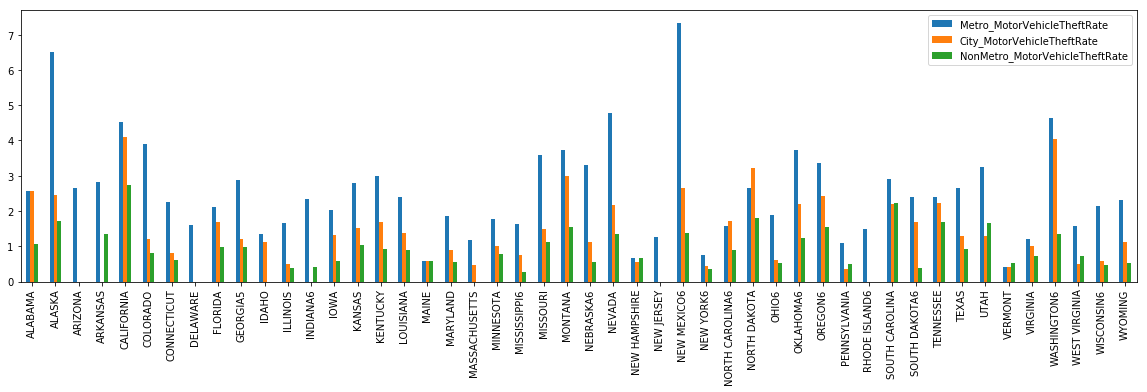

In [ ]:
# Robbery Rate per 1,000 inhabitants in Metropolitan, City outside metropolitan and Non-metropolitan area in each state

ViolentCrimeRate=pd.concat([df_crime_metro_merged["Metro_MotorVehicleTheftRate"], df_crime_cities_merged["City_MotorVehicleTheftRate"], df_crime_nonmetro_merged['NonMetro_MotorVehicleTheftRate'] ], axis=1)

fig = plt.figure()       
ax = ViolentCrimeRate.plot(figsize=(20,5), kind='bar')
plt.xticks(rotation=90)

plt.show()